In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

importing the Algos from sklearn


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_19e5bb596d4b4cfb940236e6399dc05a = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_19e5bb596d4b4cfb940236e6399dc05a = 'https://s3.private.eu.cloud-object-storage.appdomain.cloud'

client_19e5bb596d4b4cfb940236e6399dc05a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EQt9odG_s0lYjs4JyliakCu3JNg8hB6qHQ1KvoPSfEGV',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_19e5bb596d4b4cfb940236e6399dc05a)

body = client_19e5bb596d4b4cfb940236e6399dc05a.get_object(Bucket='mlalgorithmsexample-donotdelete-pr-ds6euqn6obnfus',Key='diabetes.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

diabetes_data = pd.read_csv(body)
diabetes_data.head()


In [6]:
diabetes_data.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4906b41b90>,
      dtype=object)

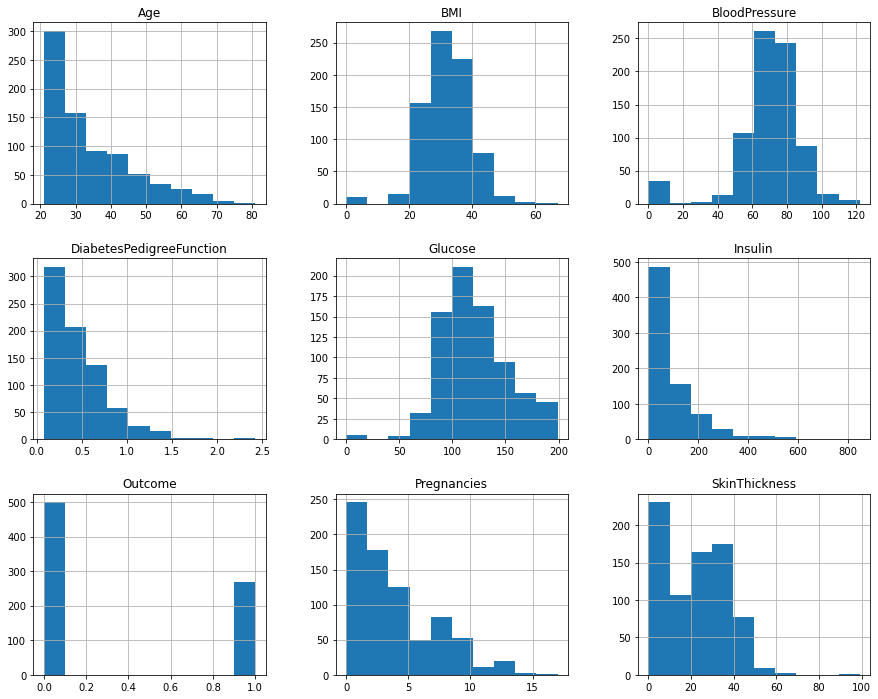

In [8]:
diabetes_data.hist(figsize=(15,12))

See the odds with BMI, BloodPressure, Glucose, Insulin, and SkinThickness all of them have values in 0 which is Practically impossible.

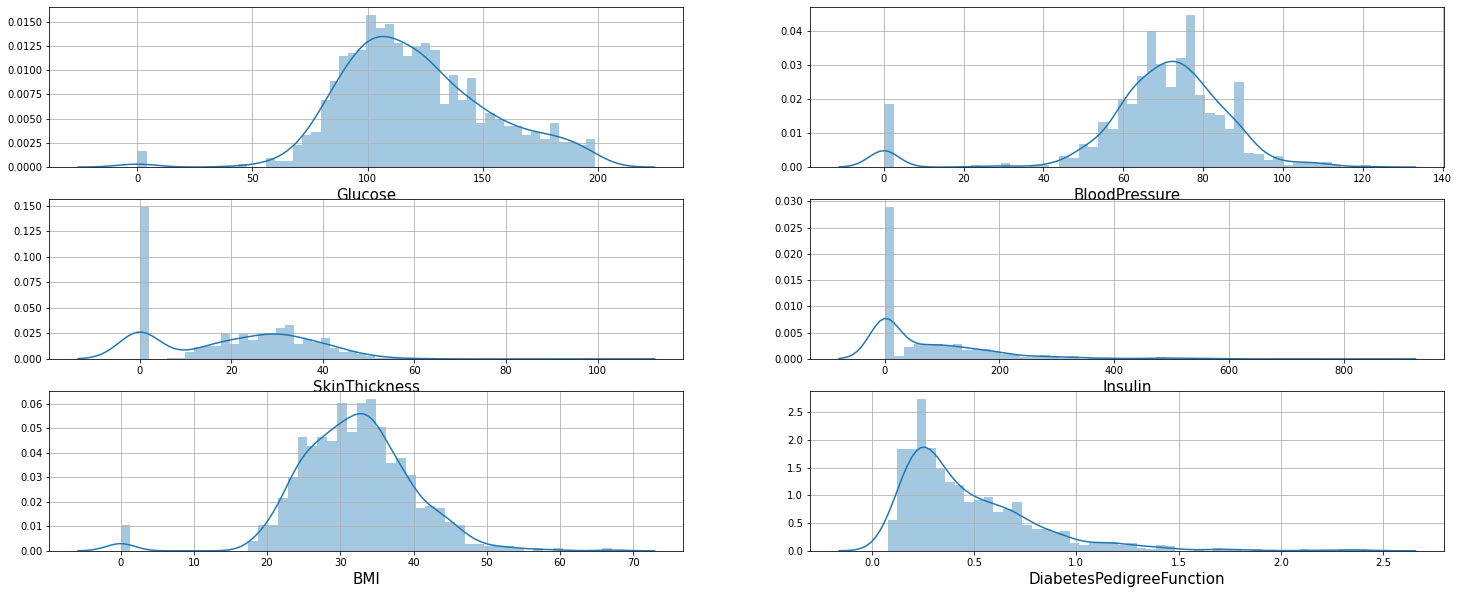

In [16]:
odds = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

diabetes_data[odds] = diabetes_data[odds].astype("float")

fig = plt.figure(figsize=(25,70))

for i in range(0,len(odds)):
    ax = fig.add_subplot(20, 2,i+1)
    g = sns.distplot(diabetes_data[odds[i]], bins = 50)
    plt.xlabel(odds[i],fontsize = 15)
    plt.grid(True)

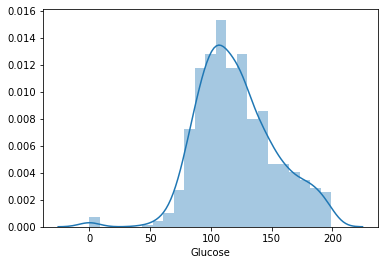

In [17]:
sns.distplot(diabetes_data["Glucose"])

There are a lot of values which are 0s

for our benefit:
Glucose lower than 50 will be replaced by mean, 
BloodPressure lower than 40 will be replaced by the mean, 
SkinThickiness lower than 10 will be replaced by the mean, 
Insulin lower than 50 will be replaced by the mean, 
BMI lower than 18 will be replaced by the mean

In [18]:
diabetes_data.loc[diabetes_data["Glucose"]<=50, "Glucose"] = np.NaN
diabetes_data.loc[diabetes_data["BloodPressure"]<=40, "BloodPressure"] = np.NaN
diabetes_data.loc[diabetes_data["SkinThickness"]<=10, "SkinThickness"] = np.NaN
diabetes_data.loc[diabetes_data["Insulin"]<=50, "Insulin"] = np.NaN
diabetes_data.loc[diabetes_data["BMI"]<=18, "BMI"] = np.NaN

In [19]:
diabetes_data["Glucose"] = diabetes_data["Glucose"].fillna(diabetes_data["Glucose"].mean())
diabetes_data["BloodPressure"] = diabetes_data["BloodPressure"].fillna(diabetes_data["BloodPressure"].mean())
diabetes_data["SkinThickness"] = diabetes_data["SkinThickness"].fillna(diabetes_data["SkinThickness"].mean())
diabetes_data["Insulin"] = diabetes_data["Insulin"].fillna(diabetes_data["Insulin"].mean())
diabetes_data["BMI"] = diabetes_data["BMI"].fillna(diabetes_data["BMI"].mean())

In [20]:
df = diabetes_data.copy()

numerical data is easy to analyse using binning or bucketing

In [21]:
#for age
bins = [0,20,30,40,50,60,70,80,100]
labels = ["0-20", "20-30","30-40","40-50","50-60","60-70","70-80","80+"]
df['Age Bracket'] = pd.cut(df["Age"], bins, labels = labels)

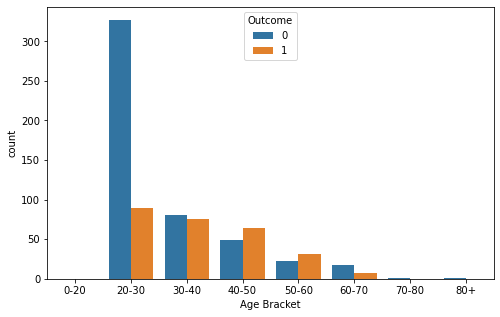

In [31]:
plt.figure(figsize = (8,5))

sns.countplot(df["Age Bracket"], hue = df["Outcome"])

In [32]:
#for bp
bp_bins = [0,60,80,90,100]
bp_labels = ["Low BP","Ideal BP", "Pre-high BP", "High BP"]
df["BloodPressure det"] = pd.cut(df["BloodPressure"], bp_bins, labels = bp_labels)

In [33]:
df["BloodPressure det"].value_counts()


Ideal BP       485
Pre-high BP    127
Low BP         118
High BP         25
Name: BloodPressure det, dtype: int64

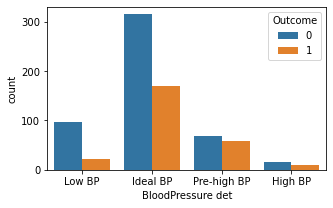

In [34]:
plt.figure(figsize = (5,3))
sns.countplot(x = df["BloodPressure det"], hue = df["Outcome"])
sns.set(font_scale = 1.1)

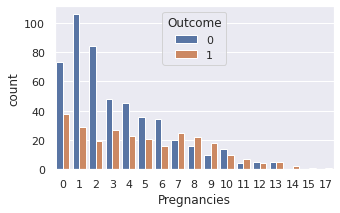

In [37]:
#for pregnants
plt.figure(figsize = (5,3))

sns.countplot(x = df["Pregnancies"], hue = df["Outcome"])
sns.set(font_scale = 1)

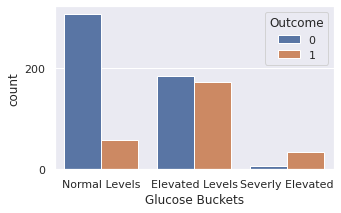

In [52]:
#glucose
glucose_bins = [0,115,180,380]
glucose_labels = ["Normal Levels","Elevated Levels", "Severly Elevated"]
df["Glucose Buckets"] = pd.cut(df["Glucose"], glucose_bins, labels = glucose_labels)
plt.figure(figsize = (5,3))
sns.countplot(df["Glucose Buckets"], hue = df["Outcome"])
sns.set(font_scale = 2)

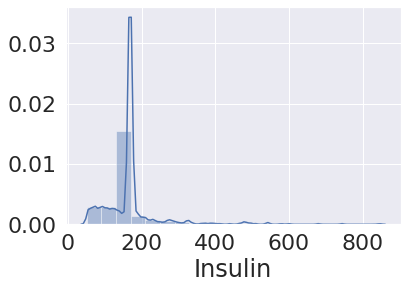

In [55]:
#insulin
sns.distplot(df["Insulin"], bins = 20)


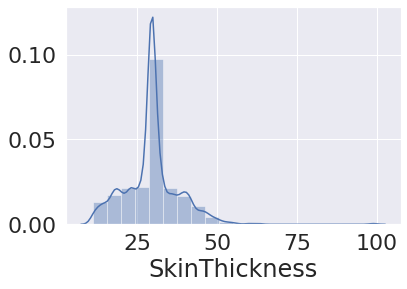

In [56]:
#skin thickness
sns.distplot(df["SkinThickness"], bins = 20)

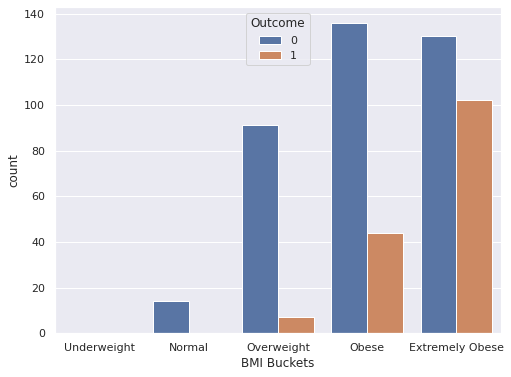

In [65]:
#bmi
bmi_bins = [0,18,20,25,30,35]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese", "Extremely Obese"]
df["BMI Buckets"] = pd.cut(df["BMI"], bmi_bins, labels = bmi_labels)
plt.figure(figsize = (8,6))
sns.countplot(df["BMI Buckets"], hue = df["Outcome"])#, color = df["Outcome"])
sns.set(font_scale = 1)

lets check the distribution

In [76]:
diabetes_data["Outcome"].value_counts()/(len(diabetes_data["Outcome"]))*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

from above it seems balanced :)

# Lets Build the Model

In [77]:
# Independent variables
X = diabetes_data.drop("Outcome", axis = 1)

# Target variable
y = diabetes_data["Outcome"]

In [78]:
#train test splitting
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1234)

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
def model_building(model, parameters = None, cv = 10, scale = False):
    if parameters == None:
        clf = model.fit(X_train, y_train)
        actual_train = y_train
        prediction_train = clf.predict(X_train)
        actual_valid = y_valid
        prediction_valid = clf.predict(X_valid)
        #evaluation
        print("Using:",algo)
        print("Training Report: \n")
        print(classification_report(actual_train, prediction_train, digits=4))
        print("AUC-ROC Score: ",round(roc_auc_score(actual_valid, prediction_valid),2))
        print()
        print("Validation Report: \n")
        print(classification_report(actual_valid, prediction_valid, digits=4))
        print("AUC-ROC Score: ",round(roc_auc_score(actual_valid, prediction_valid),2))
        print()
        return(model, prediction_train, prediction_valid)
    else:
        model_cv = GridSearchCV(estimator = model, param_grid = parameters, cv = cv)
        model_cv.fit(X_train, y_train)
        actual_train = y_train
        prediction_train = model.predict(X_train)
        actual_valid = y_valid
        prediction_valid = model.predict(X_valid)
        #evaluation
        print("Using:",algo)
        print("Training Report: \n")
        print(classification_report(actual_train, prediction_train, digits=4))
        print("auc-roc: ",round(roc_auc_score(actual_valid, prediction_valid),2))
        print()
        print("Validation Report: \n")
        print(classification_report(actual_valid, prediction_valid, digits=4))
        print("auc-roc: ",round(roc_auc_score(actual_valid, prediction_valid),2))
        print()
        model = model_cv.best_estimator_
    

        return(model_cv, prediction_train, prediction_valid)

In [83]:
algos = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier()]

In [94]:
algo=KNeighborsClassifier()
algo, pred_train, pred_valid = model_building(model, cv=10)

Using: KNeighborsClassifier()
Training Report: 

              precision    recall  f1-score   support

           0     0.8643    0.8914    0.8776       350
           1     0.7841    0.7380    0.7603       187

    accuracy                         0.8380       537
   macro avg     0.8242    0.8147    0.8190       537
weighted avg     0.8363    0.8380    0.8368       537

AUC-ROC Score:  0.74

Validation Report: 

              precision    recall  f1-score   support

           0     0.8176    0.8067    0.8121       150
           1     0.6506    0.6667    0.6585        81

    accuracy                         0.7576       231
   macro avg     0.7341    0.7367    0.7353       231
weighted avg     0.7590    0.7576    0.7582       231

AUC-ROC Score:  0.74



In [96]:
algo=LogisticRegression()
algo, pred_train, pred_valid = model_building(model, cv=10)

Using: LogisticRegression()
Training Report: 

              precision    recall  f1-score   support

           0     0.8643    0.8914    0.8776       350
           1     0.7841    0.7380    0.7603       187

    accuracy                         0.8380       537
   macro avg     0.8242    0.8147    0.8190       537
weighted avg     0.8363    0.8380    0.8368       537

AUC-ROC Score:  0.74

Validation Report: 

              precision    recall  f1-score   support

           0     0.8176    0.8067    0.8121       150
           1     0.6506    0.6667    0.6585        81

    accuracy                         0.7576       231
   macro avg     0.7341    0.7367    0.7353       231
weighted avg     0.7590    0.7576    0.7582       231

AUC-ROC Score:  0.74



In [97]:
algo=DecisionTreeClassifier()
algo, pred_train, pred_valid = model_building(model, cv=10)

Using: DecisionTreeClassifier()
Training Report: 

              precision    recall  f1-score   support

           0     0.8643    0.8914    0.8776       350
           1     0.7841    0.7380    0.7603       187

    accuracy                         0.8380       537
   macro avg     0.8242    0.8147    0.8190       537
weighted avg     0.8363    0.8380    0.8368       537

AUC-ROC Score:  0.74

Validation Report: 

              precision    recall  f1-score   support

           0     0.8176    0.8067    0.8121       150
           1     0.6506    0.6667    0.6585        81

    accuracy                         0.7576       231
   macro avg     0.7341    0.7367    0.7353       231
weighted avg     0.7590    0.7576    0.7582       231

AUC-ROC Score:  0.74



In [98]:
algo=AdaBoostClassifier()
algo, pred_train, pred_valid = model_building(model, cv=10)

Using: AdaBoostClassifier()
Training Report: 

              precision    recall  f1-score   support

           0     0.8643    0.8914    0.8776       350
           1     0.7841    0.7380    0.7603       187

    accuracy                         0.8380       537
   macro avg     0.8242    0.8147    0.8190       537
weighted avg     0.8363    0.8380    0.8368       537

AUC-ROC Score:  0.74

Validation Report: 

              precision    recall  f1-score   support

           0     0.8176    0.8067    0.8121       150
           1     0.6506    0.6667    0.6585        81

    accuracy                         0.7576       231
   macro avg     0.7341    0.7367    0.7353       231
weighted avg     0.7590    0.7576    0.7582       231

AUC-ROC Score:  0.74



In [99]:
algo=RandomForestClassifier()
algo, pred_train, pred_valid = model_building(model, cv=10)

Using: RandomForestClassifier()
Training Report: 

              precision    recall  f1-score   support

           0     0.8643    0.8914    0.8776       350
           1     0.7841    0.7380    0.7603       187

    accuracy                         0.8380       537
   macro avg     0.8242    0.8147    0.8190       537
weighted avg     0.8363    0.8380    0.8368       537

AUC-ROC Score:  0.74

Validation Report: 

              precision    recall  f1-score   support

           0     0.8176    0.8067    0.8121       150
           1     0.6506    0.6667    0.6585        81

    accuracy                         0.7576       231
   macro avg     0.7341    0.7367    0.7353       231
weighted avg     0.7590    0.7576    0.7582       231

AUC-ROC Score:  0.74



In [100]:
algo=KNeighborsClassifier()
algo, pred_train, pred_valid = model_building(model, cv=10)

Using: KNeighborsClassifier()
Training Report: 

              precision    recall  f1-score   support

           0     0.8643    0.8914    0.8776       350
           1     0.7841    0.7380    0.7603       187

    accuracy                         0.8380       537
   macro avg     0.8242    0.8147    0.8190       537
weighted avg     0.8363    0.8380    0.8368       537

AUC-ROC Score:  0.74

Validation Report: 

              precision    recall  f1-score   support

           0     0.8176    0.8067    0.8121       150
           1     0.6506    0.6667    0.6585        81

    accuracy                         0.7576       231
   macro avg     0.7341    0.7367    0.7353       231
weighted avg     0.7590    0.7576    0.7582       231

AUC-ROC Score:  0.74



Everything is determined using the Above Algos.
If we want to improve the performance we need more data.